# 0.0 Libraries



In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# 0.1 Helper Functions 

In [2]:
# supressess scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# figsize for all plots
plt.rcParams['figure.figsize'] = [11,7]

# hide warnings 
warnings.filterwarnings('ignore')

# 1.0 Loading the Data 

In [3]:
data = pd.read_csv('./datasets/kc_house_data.csv')

# 2.0 Data Inspection and Cleaning

### 2.1. Data Overview

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


### 2.2. Checking Variable Types

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2.3. NA Checking

In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2.4. Removing outliers

In [8]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [9]:
data_no_outlier = data.drop(15870)
data_no_outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


### 2.5. Cleaning duplicate information

In [10]:
print(f'{len(data_no_outlier) - data_no_outlier["id"].nunique()} duplicate ids in the dataset')

177 duplicate ids in the dataset


In [11]:
# Eg.: id 1000102 and 7200179 has info from 2014 and 2015.
data_no_outlier.sort_values('id').head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,20140508T000000,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,20140811T000000,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,20150401T000000,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,20150319T000000,402500.00,4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504
18521,3600072,20150330T000000,680000.00,4,2.75,2220,5310,1.00,0,0,...,7,1170,1050,1951,0,98144,47.58,-122.29,1540,4200
3200,3800008,20150224T000000,178000.00,5,1.50,1990,18200,1.00,0,0,...,7,1990,0,1960,0,98178,47.49,-122.26,1860,8658
21063,5200087,20140709T000000,487000.00,4,2.50,2540,5001,2.00,0,0,...,9,2540,0,2005,0,98108,47.54,-122.30,2360,6834
4333,6200017,20141112T000000,281000.00,3,1.00,1340,21336,1.50,0,0,...,5,1340,0,1945,0,98032,47.40,-122.27,1340,37703


In [12]:
# keeping the last record (most recent informations) of duplicate ids 
data_clean = data_no_outlier.drop_duplicates(subset = ['id'], keep = 'last')
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


# 3.0 Data Transformations and Feature Engineering

In [13]:
# transformation to datetime type
data_clean['date'] = pd.to_datetime(data_clean['date'], format = '%Y-%m-%d')

In [14]:
# new columns of month and year
data_clean['month'] = data_clean['date'].dt.month
data_clean['year'] = data_clean['date'].dt.year

In [15]:
# Season information

#     Spring: March 20, at 5:37 A.M.
#     Summer: June 20, at 11:32 P.M.
#     Fall: September 22, at 3:21 P.M.
#     Winter: December 21, at 10:59 A.M.
# https://www.calendarr.com/united-states/seasons-of-the-year-in-the-united-states/


data_clean['season'] = data_clean['month'].apply(lambda x: 'spring' if (x >=3) & (x<=5) else 
                                               'summer' if (x >=  6) & (x <= 8) else
                                               'fall' if (x >= 9 ) & (x <= 11) else
                                               'winter')

In [16]:
# Was the house built before or after 1955? 
data_clean['construction'] = data_clean['yr_built'].apply(lambda date: '>1955' if date > 1955 else '<1955')

In [17]:
# house condition
data_clean['condition_binary'] = data_clean['condition'].apply(lambda condition: 'good' if condition > 2 else 'bad') 

In [18]:
# view quality
data_clean['view_quality'] = data_clean['view'].apply(lambda view: 'good' if view > 2 else 'bad')

In [19]:
# does the house has a basement?
data_clean['basement'] = data_clean['sqft_basement'].apply(lambda sqft: 'yes' if sqft > 0 else 'no')

In [20]:
# sizes  
# sqft_lot - 040.00 	7618.00 	10688.00
# sqft_lot15 - 5100.00  	 7620.00 	10083.00

data_clean['lot_size'] = data_clean['sqft_lot'].apply(lambda sqft: 'large' if sqft > 7618 else 'small')
data_clean['nbh_lot_size'] = data_clean['sqft_lot15'].apply(lambda sqft: 'large' if sqft > 7620 else 'small')


In [21]:
# sizes  
# sqft_living - 1427.00 	1910.00 	2550.00 
# sqft_living15 - 1490.00 	1840.00 	2360.00

data_clean['inside_size'] = data_clean['sqft_living'].apply(lambda sqft: 'large' if sqft > 1910 else 'small')
data_clean['nbh_inside_size'] = data_clean['sqft_living15'].apply(lambda sqft: 'large' if sqft > 1840 else 'small')


In [22]:
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,season,construction,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,2014,fall,<1955,good,bad,no,small,small,small,small
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2014,winter,<1955,good,bad,yes,small,large,large,small
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,2015,winter,<1955,good,bad,no,large,large,small,large
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,2014,winter,>1955,good,bad,yes,small,small,large,small
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,2015,winter,>1955,good,bad,no,large,small,small,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,...,2014,spring,>1955,good,bad,no,small,small,small,small
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,...,2015,winter,>1955,good,bad,no,small,small,large,small
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,...,2014,summer,>1955,good,bad,no,small,small,small,small
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,...,2015,winter,>1955,good,bad,no,small,small,small,small


# 4.0 Exploratory Data Analysis

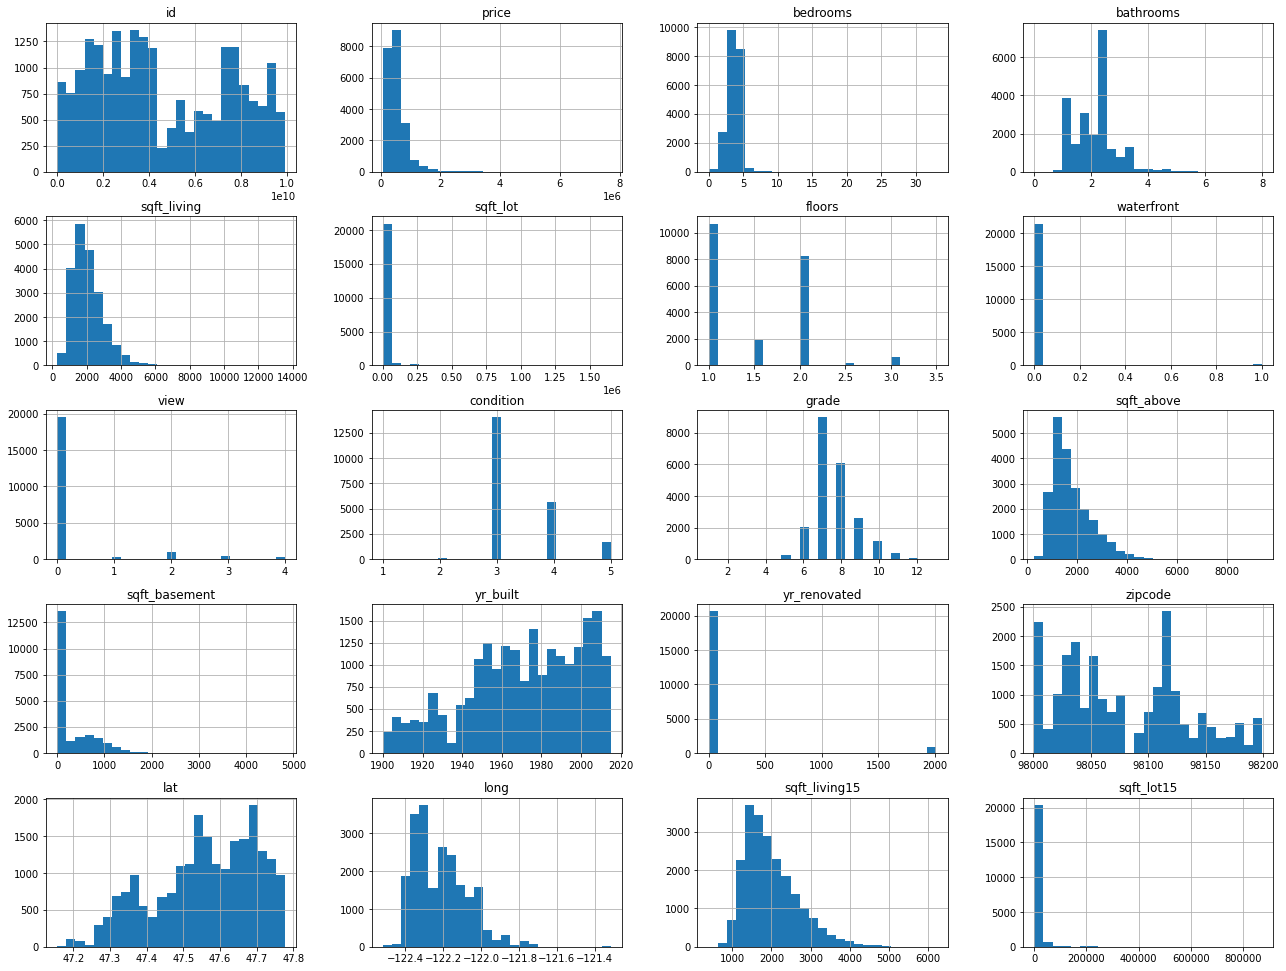

In [23]:
# Checking the general distributions

numeric_attributes = data.select_dtypes(include = ['int64', 'float64'])
fig = plt.figure(figsize=(22,17))
ax = fig.gca()
numeric_attributes.hist(ax = ax, bins = 25);

In [24]:
# Correlation plot


# 5.0 Insights


## H1 - Waterfront houses are 30% more expensive. 


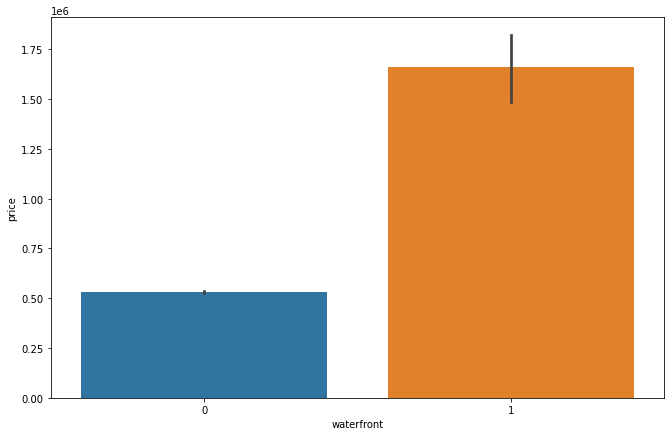

In [25]:
sns.barplot(y = data_clean.price, x = data_clean.waterfront);

In [26]:
data_clean[['price','waterfront']].groupby('waterfront').mean('price')

1661876.02/533061.43

3.117606951979249

## H2 - Houses built before 1955 are 50% less expensive.

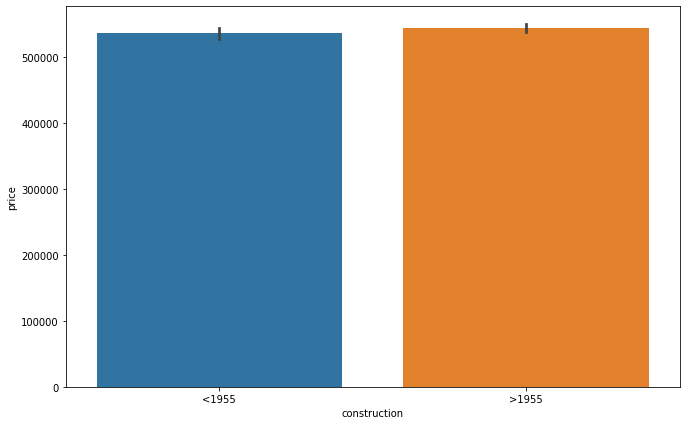

In [27]:
sns.barplot(y = data_clean.price, x = data_clean.construction);

## H3 - Houses with a basement are 30% more expensive

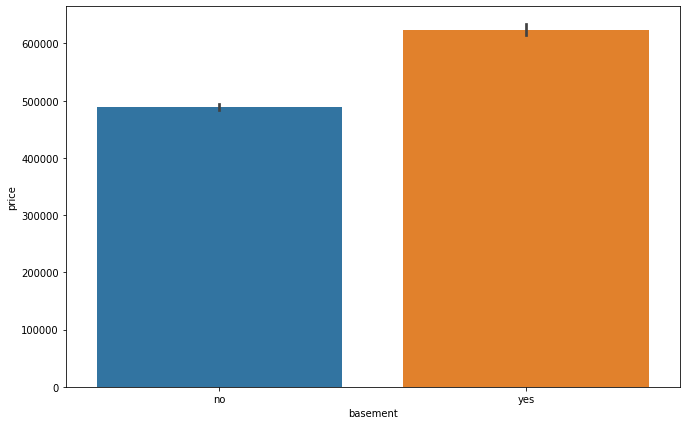

In [28]:
sns.barplot(y=data_clean.price, x=data_clean.basement);

In [29]:
data_clean[['price','basement']].groupby('basement').mean('price')

,price
basement,
no,488388.76
yes,623965.42


## H4 - The YoY rise in price is 10% 

In [30]:
# only two years on date. Barplot is better
data_clean.year.unique()

array([2014, 2015])

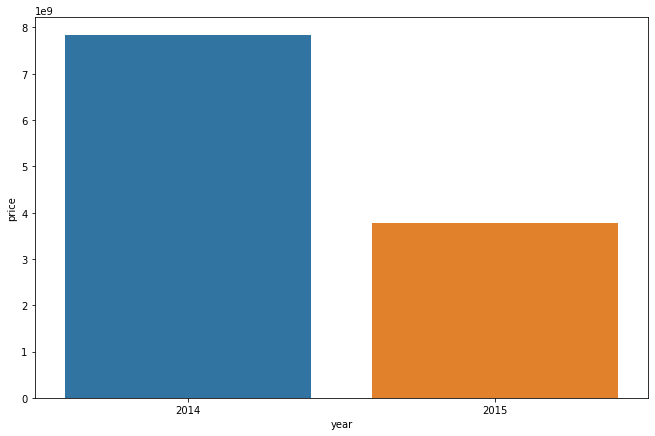

In [31]:
yoy = data_clean[['price', 'year']].groupby('year').sum('price').reset_index()
sns.barplot(y=yoy['price'],x=yoy['year']);

## H5 - The MoM rise in prices of houses with 3 bathroom is 15%

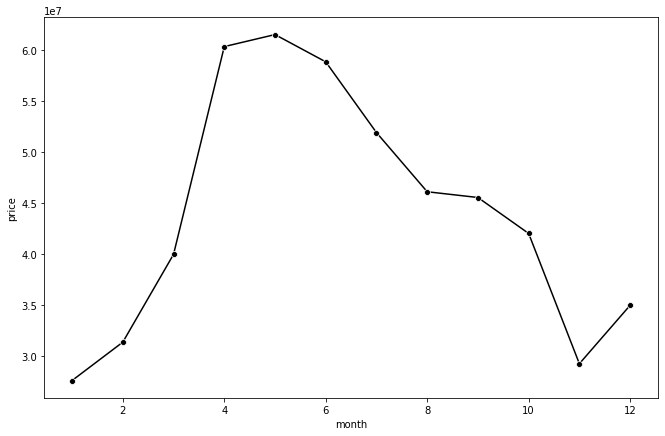

In [32]:
mom = data_clean[['month', 'price', 'bathrooms']].groupby(['month', 'bathrooms']).sum('price').reset_index()
mom_bath = mom[mom.bathrooms == 3] 

sns.lineplot(y=mom_bath.price, x= mom_bath.month, color = 'black', markers = True, style = (1), legend = False);

## H6 - The price of houses decrease 30% at every drop in condition

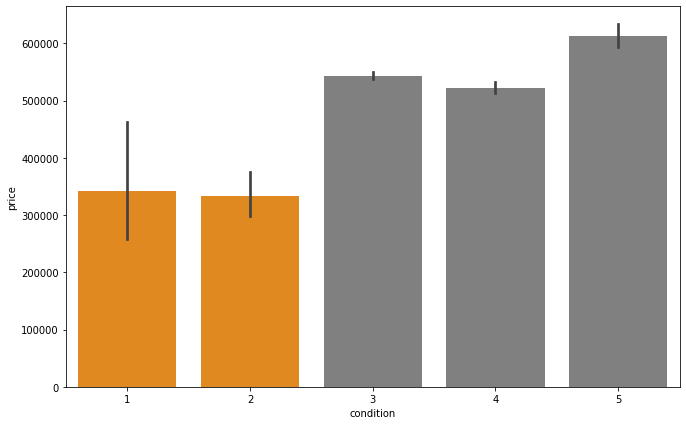

In [33]:
# sets the color pattern for the bars
colors = ['darkorange' if (x == 1 or x == 2) else 'grey' for x in sorted(data_clean.condition.unique())]

# palette can be called in the barplot function
plot = sns.barplot(y= data_clean.price,x=data.condition, palette = colors)

## H7 - Houses in good condition (3 up) and good view (3 and 4) are 30% more expensive than houses in bad condition (1-2) and good view (3 and 4) 

In [34]:
h7 = data_clean[['condition_binary', 'view_quality', 'price']].groupby(['condition_binary', 'view_quality']).mean('price').reset_index()
h7

,condition_binary,view_quality,price
0,bad,bad,332598.99
1,bad,good,419532.50
2,good,bad,518610.11
3,good,good,1164902.25


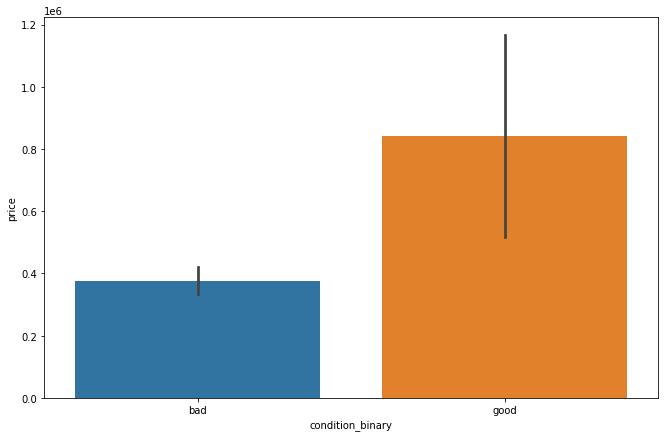

In [35]:
condition_view = h7[h7.view_quality == 'good']
sns.barplot(x=h7.condition_binary ,y=h7.price);

## H8 - Houses with good view (3 and 4) are 30% more expensive than houses with a bad view (0 to 2)


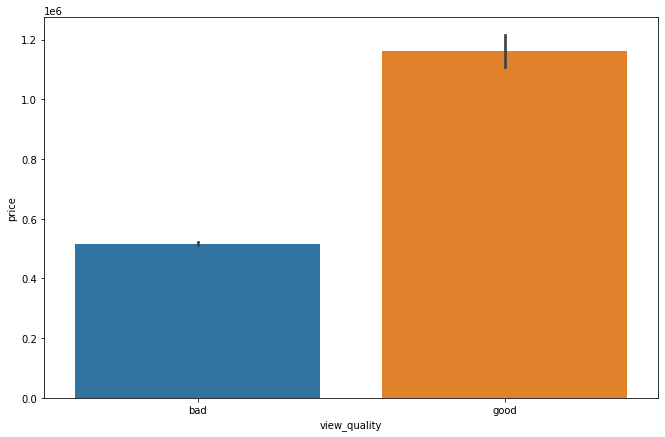

In [36]:
sns.barplot(x=data_clean.view_quality,y=data_clean.price);

## H9 - Houses with a smaller sqft_lot close to houses with a larger sqft_lot are 10% more expensive than the average

In [37]:
nbh_effect = data_clean[['price','lot_size', 'nbh_lot_size']].groupby(['lot_size','nbh_lot_size']).mean('price').reset_index()
nbh_effect

,lot_size,nbh_lot_size,price
0,large,large,586585.68
1,large,small,521604.03
2,small,large,453458.32
3,small,small,508517.94


In [2]:
nbh_effect.loc[2:3,'price']

NameError: name 'nbh_effect' is not defined

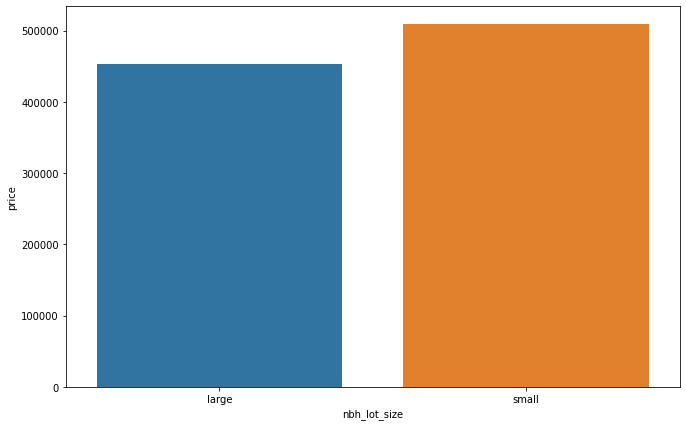

In [39]:
sns.barplot(x=nbh_effect.loc[2:3,'nbh_lot_size'],y=nbh_effect.loc[2:3,'price']);

## H10 -  Houses with a smaller sqft_living close to houses with a larger sqft_living are 10% more expensive than the average

In [40]:
nbh_effect2 = data_clean[['price','inside_size', 'nbh_inside_size']].groupby(['inside_size','nbh_inside_size']).mean('price').reset_index()
nbh_effect2

,inside_size,nbh_inside_size,price
0,large,large,738546.37
1,large,small,550884.08
2,small,large,453260.18
3,small,small,364522.45


In [41]:
nbh_effect2.loc[2:3,'price']

2   453260.18
3   364522.45
Name: price, dtype: float64

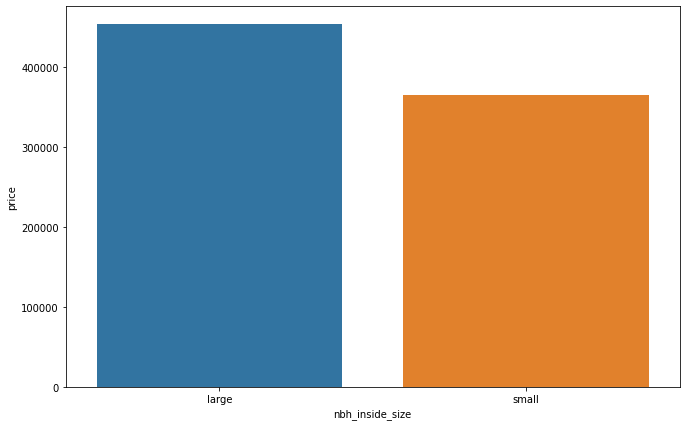

In [42]:
sns.barplot(x=nbh_effect2.loc[2:3,'nbh_inside_size'],y=nbh_effect2.loc[2:3,'price']);

# 6.0 Business Questions

## 6.1. To buy or not to buy


In [43]:
median_price = data_clean[['price','zipcode', 'waterfront']].groupby(['zipcode','waterfront']).median('price').reset_index()
median_price

,zipcode,waterfront,price
0,98001,0,260000.00
1,98002,0,235000.00
2,98003,0,269500.00
3,98004,0,1150000.00
4,98004,1,7062500.00
...,...,...,...
94,98188,0,265000.00
95,98198,0,265000.00
96,98198,1,637500.00
97,98199,0,689800.00


In [44]:
joined_data = pd.merge(data_clean, median_price, on = ['zipcode','waterfront'], how ='inner')
joined_data

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,season,construction,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,price_y
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,fall,<1955,good,bad,no,small,small,small,small,272000.00
1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1.00,0,0,...,summer,<1955,good,bad,no,small,small,small,small,272000.00
2,4058801670,2014-07-17,445000.00,3,2.25,2100,8201,1.00,0,2,...,summer,>1955,good,bad,yes,large,large,large,large,272000.00
3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,fall,>1955,good,bad,no,small,small,small,small,272000.00
4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1.00,0,0,...,winter,<1955,good,bad,no,small,large,small,small,272000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,7351200295,2015-01-14,1150000.00,3,1.75,1760,6788,2.00,1,4,...,winter,<1955,good,good,no,small,small,small,small,1360000.00
21431,3426049284,2014-08-19,2300000.00,4,3.25,4110,15929,2.00,1,4,...,summer,>1955,good,good,yes,large,large,large,large,2300000.00
21432,7278100515,2014-08-21,1295000.00,2,2.50,2910,19449,2.00,1,4,...,summer,>1955,good,good,yes,large,large,large,large,1295000.00
21433,2425049063,2014-09-11,3640900.00,4,3.25,4830,22257,2.00,1,4,...,fall,>1955,good,good,no,large,large,large,large,3640900.00


In [45]:
status = []

for i in range(len(joined_data)):
    if (joined_data.loc[i,'price_x'] < joined_data.loc[i,'price_y']) and (joined_data.loc[i,'condition'] > 2):
        status.append('Buy')
    else:
        status.append("Don't Buy")

In [46]:
joined_data['status'] = status
joined_data

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,construction,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,price_y,status
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,<1955,good,bad,no,small,small,small,small,272000.00,Buy
1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1.00,0,0,...,<1955,good,bad,no,small,small,small,small,272000.00,Buy
2,4058801670,2014-07-17,445000.00,3,2.25,2100,8201,1.00,0,2,...,>1955,good,bad,yes,large,large,large,large,272000.00,Don't Buy
3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,>1955,good,bad,no,small,small,small,small,272000.00,Buy
4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1.00,0,0,...,<1955,good,bad,no,small,large,small,small,272000.00,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,7351200295,2015-01-14,1150000.00,3,1.75,1760,6788,2.00,1,4,...,<1955,good,good,no,small,small,small,small,1360000.00,Buy
21431,3426049284,2014-08-19,2300000.00,4,3.25,4110,15929,2.00,1,4,...,>1955,good,good,yes,large,large,large,large,2300000.00,Don't Buy
21432,7278100515,2014-08-21,1295000.00,2,2.50,2910,19449,2.00,1,4,...,>1955,good,good,yes,large,large,large,large,1295000.00,Don't Buy
21433,2425049063,2014-09-11,3640900.00,4,3.25,4830,22257,2.00,1,4,...,>1955,good,good,no,large,large,large,large,3640900.00,Don't Buy


## 6.2. When to buy?

In [80]:
# Subset only the ones to be purchased
purchased = joined_data[joined_data['status'] == 'Buy' ]
purchased = purchased.rename(columns = {'price_x' : 'price'}) 
purchased = purchased.drop('price_y', axis = 1)
purchased

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,season,construction,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,status
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,fall,<1955,good,bad,no,small,small,small,small,Buy
1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1.00,0,0,...,summer,<1955,good,bad,no,small,small,small,small,Buy
3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,fall,>1955,good,bad,no,small,small,small,small,Buy
4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1.00,0,0,...,winter,<1955,good,bad,no,small,large,small,small,Buy
5,4268200055,2015-05-01,245000.00,3,1.75,1740,11547,1.00,0,0,...,spring,<1955,good,bad,no,large,large,small,small,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21420,9536600010,2014-12-23,520000.00,4,0.75,1960,8277,1.00,1,4,...,winter,<1955,good,good,yes,large,large,large,large,Buy
21422,3222049087,2015-04-22,570000.00,1,1.00,720,7540,1.00,1,4,...,spring,<1955,good,good,no,small,large,small,small,Buy
21425,7352200025,2014-10-13,1190000.00,2,1.75,2080,8112,1.00,1,4,...,fall,<1955,good,good,yes,large,large,large,large,Buy
21427,7351200050,2014-12-18,1335000.00,4,1.75,2300,13342,1.50,1,4,...,winter,<1955,good,good,no,large,large,large,large,Buy


In [81]:
# group the purchased houses by zipcode, waterfront, season and take the mean - This will see if season interferes.
purchased_median = purchased[['price','zipcode', 'waterfront','season']].groupby(['zipcode','waterfront','season']).median('price').reset_index()
purchased_median

,zipcode,waterfront,season,price
0,98001,0,fall,217500.00
1,98001,0,spring,210500.00
2,98001,0,summer,213300.00
3,98001,0,winter,228250.00
4,98002,0,fall,195250.00
...,...,...,...,...
321,98198,1,winter,520000.00
322,98199,0,fall,511200.00
323,98199,0,spring,541557.50
324,98199,0,summer,520000.00


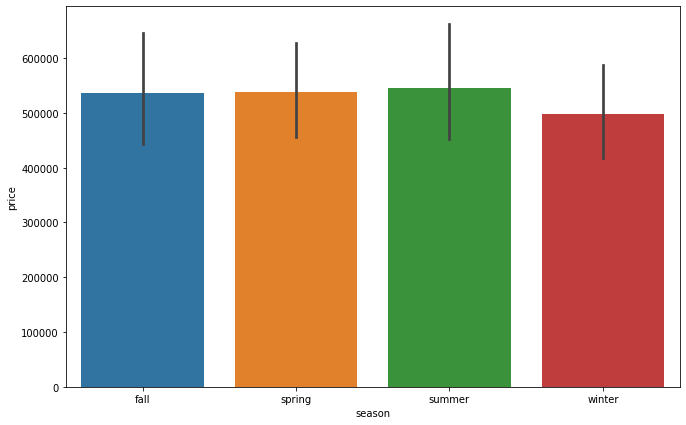

In [82]:
# small possible drop on prices during winter 
sns.barplot(x=purchased_median.season,y=purchased_median.price);

In [83]:
# Merges with the purchased data - prince_y is the merged price by season
joined_data_purchased = pd.merge(purchased_median, purchased, on = ['zipcode','waterfront','season'], how ='inner')
joined_data_purchased = joined_data_purchased.rename(columns = {'price_x' : 'price_by_season', 'price_y': 'buying_price'}) 
joined_data_purchased

,zipcode,waterfront,season,price_by_season,id,date,buying_price,bedrooms,bathrooms,sqft_living,...,year,construction,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,status
0,98001,0,fall,217500.00,3353401710,2014-09-23,227950.00,3,1.50,1670,...,2014,<1955,good,bad,no,large,small,small,large,Buy
1,98001,0,fall,217500.00,7967200060,2014-09-08,243000.00,3,1.75,1450,...,2014,>1955,good,bad,no,large,large,small,small,Buy
2,98001,0,fall,217500.00,8159610060,2014-11-19,233000.00,3,2.00,1400,...,2014,>1955,good,bad,no,large,large,small,large,Buy
3,98001,0,fall,217500.00,5066400483,2014-11-20,249900.00,3,1.75,1380,...,2014,<1955,good,bad,no,large,large,small,small,Buy
4,98001,0,fall,217500.00,3329530200,2014-09-10,205000.00,3,2.00,1410,...,2014,>1955,good,bad,no,large,large,small,small,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,98199,0,winter,565000.00,871000155,2014-12-11,665000.00,3,1.00,1650,...,2014,<1955,good,bad,yes,small,small,small,small,Buy
10482,98199,0,winter,565000.00,8127700845,2015-02-19,375000.00,2,1.00,710,...,2015,<1955,good,bad,no,small,small,small,small,Buy
10483,98199,0,winter,565000.00,2771101921,2014-12-11,377000.00,2,1.50,1000,...,2014,>1955,good,bad,yes,small,small,small,small,Buy
10484,98199,0,winter,565000.00,6821101732,2015-02-19,550000.00,3,2.25,1230,...,2015,>1955,good,bad,no,small,small,small,small,Buy


- Se o preço da compra for maior que a mediana = preço de venda + 10% - tenho menos margem pra lucro
- Se o preço da compra for menor que a mediana = preço de venda + 30% - tenho mais margem pra lucro

In [112]:
profit = []

for i in range(len(joined_data_purchased)):
    if (joined_data_purchased.loc[i,'buying_price'] < joined_data_purchased.loc[i,'price_by_season']) and (joined_data_purchased.loc[i,'condition'] > 2):
        profit.append(0.3)
    else:
        profit.append(0.1)

In [113]:
joined_data_purchased['profit_margin'] = profit
joined_data_purchased

,zipcode,waterfront,season,price_by_season,id,date,buying_price,bedrooms,bathrooms,sqft_living,...,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,status,profit_margin,selling_price
0,98001,0,fall,217500.00,3353401710,2014-09-23,227950.00,3,1.50,1670,...,good,bad,no,large,small,small,large,Buy,0.10,2507450.00
1,98001,0,fall,217500.00,7967200060,2014-09-08,243000.00,3,1.75,1450,...,good,bad,no,large,large,small,small,Buy,0.10,2673000.00
2,98001,0,fall,217500.00,8159610060,2014-11-19,233000.00,3,2.00,1400,...,good,bad,no,large,large,small,large,Buy,0.10,2563000.00
3,98001,0,fall,217500.00,5066400483,2014-11-20,249900.00,3,1.75,1380,...,good,bad,no,large,large,small,small,Buy,0.10,2748900.00
4,98001,0,fall,217500.00,3329530200,2014-09-10,205000.00,3,2.00,1410,...,good,bad,no,large,large,small,small,Buy,0.30,6355000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,98199,0,winter,565000.00,871000155,2014-12-11,665000.00,3,1.00,1650,...,good,bad,yes,small,small,small,small,Buy,0.10,7315000.00
10482,98199,0,winter,565000.00,8127700845,2015-02-19,375000.00,2,1.00,710,...,good,bad,no,small,small,small,small,Buy,0.30,11625000.00
10483,98199,0,winter,565000.00,2771101921,2014-12-11,377000.00,2,1.50,1000,...,good,bad,yes,small,small,small,small,Buy,0.30,11687000.00
10484,98199,0,winter,565000.00,6821101732,2015-02-19,550000.00,3,2.25,1230,...,good,bad,no,small,small,small,small,Buy,0.30,17050000.00


In [114]:
# create a selling price 

selling_price = []
for i in range(len(joined_data_purchased)):
    sell = joined_data_purchased.loc[i,'buying_price']*joined_data_purchased.loc[i,'profit_margin'] + joined_data_purchased.loc[i,'buying_price']
    selling_price.append(sell)
    
    
joined_data_purchased['selling_price'] = selling_price
joined_data_purchased

,zipcode,waterfront,season,price_by_season,id,date,buying_price,bedrooms,bathrooms,sqft_living,...,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,status,profit_margin,selling_price
0,98001,0,fall,217500.00,3353401710,2014-09-23,227950.00,3,1.50,1670,...,good,bad,no,large,small,small,large,Buy,0.10,250745.00
1,98001,0,fall,217500.00,7967200060,2014-09-08,243000.00,3,1.75,1450,...,good,bad,no,large,large,small,small,Buy,0.10,267300.00
2,98001,0,fall,217500.00,8159610060,2014-11-19,233000.00,3,2.00,1400,...,good,bad,no,large,large,small,large,Buy,0.10,256300.00
3,98001,0,fall,217500.00,5066400483,2014-11-20,249900.00,3,1.75,1380,...,good,bad,no,large,large,small,small,Buy,0.10,274890.00
4,98001,0,fall,217500.00,3329530200,2014-09-10,205000.00,3,2.00,1410,...,good,bad,no,large,large,small,small,Buy,0.30,266500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,98199,0,winter,565000.00,871000155,2014-12-11,665000.00,3,1.00,1650,...,good,bad,yes,small,small,small,small,Buy,0.10,731500.00
10482,98199,0,winter,565000.00,8127700845,2015-02-19,375000.00,2,1.00,710,...,good,bad,no,small,small,small,small,Buy,0.30,487500.00
10483,98199,0,winter,565000.00,2771101921,2014-12-11,377000.00,2,1.50,1000,...,good,bad,yes,small,small,small,small,Buy,0.30,490100.00
10484,98199,0,winter,565000.00,6821101732,2015-02-19,550000.00,3,2.25,1230,...,good,bad,no,small,small,small,small,Buy,0.30,715000.00


In [132]:
#subset - id, location, condition, price of buying, price of selling, season
investment_options = joined_data_purchased[['id', 'zipcode', 'condition_binary', 'view_quality',
                                            'waterfront','basement','nbh_inside_size','inside_size',
                                            'buying_price','profit_margin', 'selling_price', 'season']]

investment_options

,id,zipcode,condition_binary,view_quality,waterfront,basement,nbh_inside_size,inside_size,buying_price,profit_margin,selling_price,season
0,3353401710,98001,good,bad,0,no,large,small,227950.00,0.10,250745.00,fall
1,7967200060,98001,good,bad,0,no,small,small,243000.00,0.10,267300.00,fall
2,8159610060,98001,good,bad,0,no,large,small,233000.00,0.10,256300.00,fall
3,5066400483,98001,good,bad,0,no,small,small,249900.00,0.10,274890.00,fall
4,3329530200,98001,good,bad,0,no,small,small,205000.00,0.30,266500.00,fall
...,...,...,...,...,...,...,...,...,...,...,...,...
10481,871000155,98199,good,bad,0,yes,small,small,665000.00,0.10,731500.00,winter
10482,8127700845,98199,good,bad,0,no,small,small,375000.00,0.30,487500.00,winter
10483,2771101921,98199,good,bad,0,yes,small,small,377000.00,0.30,490100.00,winter
10484,6821101732,98199,good,bad,0,no,small,small,550000.00,0.30,715000.00,winter


### 6.2.1. Possible Profit

#### Total Possible Profit - buying all 10486 houses.


In [139]:
profit_10486 = joined_data_purchased['selling_price'].sum() - joined_data_purchased['buying_price'].sum()

#### Profit - buying only the houses with a large profit_margin (30%)

In [141]:
investment_options_profit30 = joined_data_purchased[(joined_data_purchased['profit_margin'] == 0.3)]
investment_options_profit30

,zipcode,waterfront,season,price_by_season,id,date,buying_price,bedrooms,bathrooms,sqft_living,...,condition_binary,view_quality,basement,lot_size,nbh_lot_size,inside_size,nbh_inside_size,status,profit_margin,selling_price
4,98001,0,fall,217500.00,3329530200,2014-09-10,205000.00,3,2.00,1410,...,good,bad,no,large,large,small,small,Buy,0.30,266500.00
5,98001,0,fall,217500.00,8856004730,2014-09-17,199950.00,2,2.75,1590,...,good,bad,no,large,small,small,small,Buy,0.30,259935.00
6,98001,0,fall,217500.00,3356404330,2014-11-19,206000.00,4,2.00,1720,...,good,bad,no,small,large,small,small,Buy,0.30,267800.00
7,98001,0,fall,217500.00,7967600069,2014-11-17,185000.00,3,1.00,980,...,good,bad,no,large,large,small,small,Buy,0.30,240500.00
8,98001,0,fall,217500.00,5413200140,2014-10-21,213550.00,3,2.50,1580,...,good,bad,no,large,small,small,small,Buy,0.30,277615.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,98199,0,winter,565000.00,6917700305,2015-02-19,529000.00,2,1.00,1210,...,good,bad,yes,large,small,small,small,Buy,0.30,687700.00
10482,98199,0,winter,565000.00,8127700845,2015-02-19,375000.00,2,1.00,710,...,good,bad,no,small,small,small,small,Buy,0.30,487500.00
10483,98199,0,winter,565000.00,2771101921,2014-12-11,377000.00,2,1.50,1000,...,good,bad,yes,small,small,small,small,Buy,0.30,490100.00
10484,98199,0,winter,565000.00,6821101732,2015-02-19,550000.00,3,2.25,1230,...,good,bad,no,small,small,small,small,Buy,0.30,715000.00


In [146]:
profit_30 = investment_options_profit30['selling_price'].sum() - investment_options_profit30['buying_price'].sum()


# 6.0. Production

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# FUNCTIONS


def column_creator_binary(data, new_column, reference_column, labels, condition):
    data[new_column] = data[reference_column].apply(lambda x: labels[0] if x > condition[i] else labels[1])
    return data


# ------------------
# EXTRACTION
# --------------------

data = pd.read_csv('./datasets/kc_house_data.csv')

# ------------------
# TRANSFORM
# --------------------

### 2.4. Removing outliers
data_no_outlier = data.drop(15870)

# keeping the last record (most recent informations) of duplicate ids 
data_clean = data_no_outlier.drop_duplicates(subset = ['id'], keep = 'last')

# transformation to datetime type
data_clean['date'] = pd.to_datetime(data_clean['date'], format = '%Y-%m-%d')

# new columns of month and year
data_clean['month'] = data_clean['date'].dt.month
data_clean['year'] = data_clean['date'].dt.year

# Season information
data_clean['season'] = data_clean['month'].apply(lambda x: 'spring' if (x >=3) & (x<=5) else 
                                               'summer' if (x >=  6) & (x <= 8) else
                                               'fall' if (x >= 9 ) & (x <= 11) else
                                               'winter')
# Creating column:
data_clean['construction'] = data_clean['yr_built'].apply(lambda date: '>1955' if date > 1955 else '<1955')
data_clean['condition_binary'] = data_clean['condition'].apply(lambda condition: 'good' if condition > 2 else 'bad') 
data_clean['view_quality'] = data_clean['view'].apply(lambda view: 'good' if view > 2 else 'bad')
data_clean['basement'] = data_clean['sqft_basement'].apply(lambda sqft: 'yes' if sqft > 0 else 'no')
data_clean['lot_size'] = data_clean['sqft_lot'].apply(lambda sqft: 'large' if sqft > 7618 else 'small')
data_clean['nbh_lot_size'] = data_clean['sqft_lot15'].apply(lambda sqft: 'large' if sqft > 7620 else 'small')
data_clean['inside_size'] = data_clean['sqft_living'].apply(lambda sqft: 'large' if sqft > 1910 else 'small')
data_clean['nbh_inside_size'] = data_clean['sqft_living15'].apply(lambda sqft: 'large' if sqft > 1840 else 'small')

## To buy or not to buy

median_price = data_clean[['price','zipcode', 'waterfront']].groupby(['zipcode','waterfront']).median('price').reset_index()
opportunities = pd.merge(data_clean, median_price, on = ['zipcode','waterfront'], how ='inner')

status = []
for i in range(len(joined_data)):
    if (joined_data.loc[i,'price_x'] < joined_data.loc[i,'price_y']) and (joined_data.loc[i,'condition'] > 2):
        status.append('Buy')
    else:
        status.append("Don't Buy")

opportunities['status'] = status


## When to buy?

# Subset only the ones to be purchased
purchased = joined_data[joined_data['status'] == 'Buy' ]
purchased = purchased.rename(columns = {'price_x' : 'price'}) 
purchased = purchased.drop('price_y', axis = 1)

# group the purchased houses by zipcode, waterfront, season and take the mean - This will see if season interferes.
purchased_median = purchased[['price','zipcode', 'waterfront','season']].groupby(['zipcode','waterfront','season']).median('price').reset_index()

# Merges with the purchased data - prince_y is the merged price by season
season_opportunities = pd.merge(purchased_median, purchased, on = ['zipcode','waterfront','season'], how ='inner')
season_opportunities = season_opportunities.rename(columns = {'price_x' : 'price_by_season', 'price_y': 'buying_price'}) 

profit = []
for i in range(len(season_opportunities)):
    if (season_opportunities.loc[i,'buying_price'] < season_opportunities.loc[i,'price_by_season']) and (season_opportunities.loc[i,'condition'] > 2):
        profit.append(0.3)
    else:
        profit.append(0.1)

season_opportunities['profit_margin'] = profit

selling_price = []
for i in range(len(season_opportunities)):
    sell = season_opportunities.loc[i,'buying_price']*season_opportunities.loc[i,'profit_margin'] + season_opportunities.loc[i,'buying_price']
    selling_price.append(sell)
        
season_opportunities['selling_price'] = selling_price

investment_options_profit30 = season_opportunities[(joined_data_purchased['profit_margin'] == 0.3)]

#-------------
# LOAD
#-------------

## H1 
sns.barplot(y = data_clean.price, x = data_clean.waterfront);

## H2 
sns.barplot(y = data_clean.price, x = data_clean.construction);

## H3 
sns.barplot(y=data_clean.price, x=data_clean.basement);

## H4 
yoy = data_clean[['price', 'year']].groupby('year').sum('price').reset_index()
sns.barplot(y=yoy['price'],x=yoy['year']);

## H5 
mom = data_clean[['month', 'price', 'bathrooms']].groupby(['month', 'bathrooms']).sum('price').reset_index()
mom_bath = mom[mom.bathrooms == 3] 

sns.lineplot(y=mom_bath.price, x= mom_bath.month, color = 'black', markers = True, style = (1), legend = False);

## H6 
colors = ['darkorange' if (x == 1 or x == 2) else 'grey' for x in sorted(data_clean.condition.unique())]
plot = sns.barplot(y= data_clean.price,x=data.condition, palette = colors)

## H7 
h7 = data_clean[['condition_binary', 'view_quality', 'price']].groupby(['condition_binary', 'view_quality']).mean('price').reset_index()
condition_view = h7[h7.view_quality == 'good']
sns.barplot(x=h7.condition_binary ,y=h7.price);

## H8 
sns.barplot(x=data_clean.view_quality,y=data_clean.price);

## H9 
nbh_effect = data_clean[['price','lot_size', 'nbh_lot_size']].groupby(['lot_size','nbh_lot_size']).mean('price').reset_index()
nbh_effect.loc[2:3,'price']
sns.barplot(x=nbh_effect.loc[2:3,'nbh_lot_size'],y=nbh_effect.loc[2:3,'price']);

## H10
nbh_effect2 = data_clean[['price','inside_size', 'nbh_inside_size']].groupby(['inside_size','nbh_inside_size']).mean('price').reset_index()
nbh_effect2.loc[2:3,'price']
sns.barplot(x=nbh_effect2.loc[2:3,'nbh_inside_size'],y=nbh_effect2.loc[2:3,'price']);


def data_collect(path):
    data = pd.read_csv('./datasets/kc_house_data.csv')
    data_no_outlier = data.drop(15870)

    # keeping the last record (most recent informations) of duplicate ids 
    data_clean = data_no_outlier.drop_duplicates(subset = ['id'], keep = 'last')

    # transformation to datetime type
    data_clean['date'] = pd.to_datetime(data_clean['date'], format = '%Y-%m-%d')

    return data    

    
def data_transform(data):

    ### 2.4. Removing outliers
 
    # new columns of month and year
    data_clean['month'] = data_clean['date'].dt.month
    data_clean['year'] = data_clean['date'].dt.year

    # Season information
    data_clean['season'] = data_clean['month'].apply(lambda x: 'spring' if (x >=3) & (x<=5) else 
                                                   'summer' if (x >=  6) & (x <= 8) else
                                                   'fall' if (x >= 9 ) & (x <= 11) else
                                                   'winter')
    # Creating column:
    data_clean['construction'] = data_clean['yr_built'].apply(lambda date: '>1955' if date > 1955 else '<1955')
    data_clean['condition_binary'] = data_clean['condition'].apply(lambda condition: 'good' if condition > 2 else 'bad') 
    data_clean['view_quality'] = data_clean['view'].apply(lambda view: 'good' if view > 2 else 'bad')
    data_clean['basement'] = data_clean['sqft_basement'].apply(lambda sqft: 'yes' if sqft > 0 else 'no')
    data_clean['lot_size'] = data_clean['sqft_lot'].apply(lambda sqft: 'large' if sqft > 7618 else 'small')
    data_clean['nbh_lot_size'] = data_clean['sqft_lot15'].apply(lambda sqft: 'large' if sqft > 7620 else 'small')
    data_clean['inside_size'] = data_clean['sqft_living'].apply(lambda sqft: 'large' if sqft > 1910 else 'small')
    data_clean['nbh_inside_size'] = data_clean['sqft_living15'].apply(lambda sqft: 'large' if sqft > 1840 else 'small')

    ## To buy or not to buy

    median_price = data_clean[['price','zipcode', 'waterfront']].groupby(['zipcode','waterfront']).median('price').reset_index()
    opportunities = pd.merge(data_clean, median_price, on = ['zipcode','waterfront'], how ='inner')

    status = []
    for i in range(len(joined_data)):
        if (joined_data.loc[i,'price_x'] < joined_data.loc[i,'price_y']) and (joined_data.loc[i,'condition'] > 2):
            status.append('Buy')
        else:
            status.append("Don't Buy")

    opportunities['status'] = status
    



    ## When to buy?

    # Subset only the ones to be purchased
    purchased = joined_data[joined_data['status'] == 'Buy' ]
    purchased = purchased.rename(columns = {'price_x' : 'price'}) 
    purchased = purchased.drop('price_y', axis = 1)

    # group the purchased houses by zipcode, waterfront, season and take the mean - This will see if season interferes.
    purchased_median = purchased[['price','zipcode', 'waterfront','season']].groupby(['zipcode','waterfront','season']).median('price').reset_index()

    # Merges with the purchased data - prince_y is the merged price by season
    season_opportunities = pd.merge(purchased_median, purchased, on = ['zipcode','waterfront','season'], how ='inner')
    season_opportunities = season_opportunities.rename(columns = {'price_x' : 'price_by_season', 'price_y': 'buying_price'}) 

    profit = []
    for i in range(len(season_opportunities)):
        if (season_opportunities.loc[i,'buying_price'] < season_opportunities.loc[i,'price_by_season']) and (season_opportunities.loc[i,'condition'] > 2):
            profit.append(0.3)
        else:
            profit.append(0.1)

    season_opportunities['profit_margin'] = profit

    selling_price = []
    for i in range(len(season_opportunities)):
        sell = season_opportunities.loc[i,'buying_price']*season_opportunities.loc[i,'profit_margin'] + season_opportunities.loc[i,'buying_price']
        selling_price.append(sell)

    season_opportunities['selling_price'] = selling_price

    investment_options_profit30 = season_opportunities[(joined_data_purchased['profit_margin'] == 0.3)]
    return data, opportunities

def data_load()



if __name__ == '__main__':
    
    #collect
    
    data_raw = data_collect('./datasets/kc_house_data.csv')
    
    #transform
    
    data_transformed = data_transform(data_raw)
        
    
    #load
    
    data_load(data_transformed)



In [152]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#produtction 

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt




def date_column_creator(data,new_column,reference_column,data_format):
    if len(new_column) == len(data_format):
        for i in range(len(new_column)):
            data[new_column[i]] = data[reference_column].dt.data_format[i]
            return data
        

def column_creator_binary(data, new_column, reference_column, labels, condition):
    data[new_column] = data[reference_column].apply(lambda x: labels[0] if x > condition[i] else labels[1])
    return data

def groupby_function(data, subset, group_by, function, target_column):
    grouped_data = data[[subset]].groupby([group_by]).function(target_column)
    return grouped_data


def plot_creator(data, y_column, x_column):
    sns.barplot(y = data.y_column, x = data.x_column);
    return None

def opportunities(data, subset, group_by, function):
    grouped_data = groupby_function(data, subset, group_by, function, 'price')
    joined_data = pd.merge(data, grouped_data, on = [group_by], how ='inner')
    
    status = []

    for i in range(len(joined_data)):
        if (joined_data.loc[i,'price_x'] < joined_data.loc[i,'price_y']) and (joined_data.loc[i,'condition'] > 2):
            status.append('Buy')
        else:
            status.append("Don't Buy")

    joined_data['status'] = status
    joined_data = joined_data.rename(columns = {'price_x' : 'buying_price'}) 
    joined_data = joined_data.drop('price_y', axis=1)
    return joined_data

def selling_price_generator(opport_data, subset, group_by,function)
    purchased = opport_data[opport_data['status'] == 'Buy']
    grouped_data = groupby_function(purchased, subset, group_by, function, 'price')
    joined_data = pd.merge(grouped_data, purchased, on = [group_by], how ='inner')
    joined_data = joined_data.rename(columns = {'price_x' : 'price_by_season', 'price_y': 'buying_price'}) 

    profit = []

    for i in range(len(joined_data)):
        if (joined_data.loc[i,'buying_price'] < joined_data.loc[i,'price_by_season']) and (joined_data.loc[i,'condition'] > 2):
            profit.append(0.3)
        else:
            profit.append(0.1)

    joined_data['profit_margin'] = profit
    
    selling_price = []
    for i in range(len(joined_data)):
        sell = joined_data.loc[i,'buying_price']*joined_data.loc[i,'profit_margin'] + joined_data.loc[i,'buying_price']
        selling_price.append(sell)


    joined_data['selling_price'] = selling_price
    
    return joined_data


# LOAD

data = get_data('./datasets/kc_house_data.csv')


# TRANSFORMATION

date_column_creator(data,['month','year'],'date', [month,year])


column_creator_binary(data, 'construction', 'yr_built', ['>1955', '<1955' ], 1955)
column_creator_binary(data, 'condition_binary', 'condition', ['good', 'bad' ], 2)
column_creator_binary(data, 'view_quality', 'view', ['good', 'bad' ], 2)
column_creator_binary(data, 'basement', 'sqft_basement', ['yes', 'no' ], 0)
column_creator_binary(data, 'inside_size', 'sqft_living', ['large', 'small' ], 1910)
column_creator_binary(data, 'nbh_inside_size', 'sqft_living15', ['large', 'small' ], 1840)
column_creator_binary(data, 'lot_size', 'sqft_lot', ['large', 'small' ], 7618)
column_creator_binary(data, 'nbh_lot_size', 'sqft_lot15', ['large', 'small' ], 7620)







def column_creator_binary(data, new_column, reference_column, labels, condition):
    
    data[new_column] = data[reference_column].apply(lambda x: labels[0] if x > condition else labels[1])
    return data


# Season information


# Was the house built before or after 1955? 
data_clean['construction'] = data_clean['yr_built'].apply(lambda date: '>1955' if date > 1955 else '<1955')


# house condition
data_clean['condition_binary'] = data_clean['condition'].apply(lambda condition: 'good' if condition > 2 else 'bad') 


# view quality
data_clean['view_quality'] = data_clean['view'].apply(lambda view: 'good' if view > 2 else 'bad')


# does the house has a basement?
data_clean['basement'] = data_clean['sqft_basement'].apply(lambda sqft: 'yes' if sqft > 0 else 'no')


# sizes  
# sqft_lot - 040.00 	7618.00 	10688.00
# sqft_lot15 - 5100.00  	 7620.00 	10083.00
data_clean['lot_size'] = data_clean['sqft_lot'].apply(lambda sqft: 'large' if sqft > 7618 else 'small')
data_clean['nbh_lot_size'] = data_clean['sqft_lot15'].apply(lambda sqft: 'large' if sqft > 7620 else 'small')


# sizes  
# sqft_living - 1427.00 	1910.00 	2550.00 
# sqft_living15 - 1490.00 	1840.00 	2360.00
data_clean['inside_size'] = data_clean['sqft_living'].apply(lambda sqft: 'large' if sqft > 1910 else 'small')
data_clean['nbh_inside_size'] = data_clean['sqft_living15'].apply(lambda sqft: 'large' if sqft > 1840 else 'small')




#PLOTS

#h1
sns.barplot(y = data_clean.price, x = data_clean.waterfront);
    
#h2
sns.barplot(y = data_clean.price, x = data_clean.construction);
    

#h3
sns.barplot(y=data_clean.price, x=data_clean.basement);

#h4
yoy = data_clean[['price', 'year']].groupby('year').sum('price').reset_index()
sns.barplot(y=yoy['price'],x=yoy['year']);

#h5
mom = data_clean[['month', 'price', 'bathrooms']].groupby(['month', 'bathrooms']).sum('price').reset_index()
mom_bath = mom[mom.bathrooms == 3] 

sns.lineplot(y=mom_bath.price, x= mom_bath.month, color = 'black', markers = True, style = (1), legend = False);

#h6
# sets the color pattern for the bars
colors = ['darkorange' if (x == 1 or x == 2) else 'grey' for x in sorted(data_clean.condition.unique())]

# palette can be called in the barplot function
plot = sns.barplot(y= data_clean.price,x=data.condition, palette = colors)

#h7
h7 = data_clean[['condition_binary', 'view_quality', 'price']].groupby(['condition_binary', 'view_quality']).mean('price').reset_index()
condition_view = h7[h7.view_quality == 'good']
sns.barplot(x=h7.condition_binary ,y=h7.price);

#h8
sns.barplot(x=data_clean.view_quality,y=data_clean.price);

#h9
nbh_effect = data_clean[['price','lot_size', 'nbh_lot_size']].groupby(['lot_size','nbh_lot_size']).mean('price').reset_index()
sns.barplot(x=nbh_effect.loc[2:3,'nbh_lot_size'],y=nbh_effect.loc[2:3,'price']);

#h10
nbh_effect2 = data_clean[['price','inside_size', 'nbh_inside_size']].groupby(['inside_size','nbh_inside_size']).mean('price').reset_index()
sns.barplot(x=nbh_effect2.loc[2:3,'nbh_inside_size'],y=nbh_effect2.loc[2:3,'price']);    
    
    
    
    
    
    
    
# GROUPBY


# LOAD




In [151]:
# função load

# função_datetime

    


In [153]:
data.waterfront.unique()

array([0, 1])